# Lineare Regression am Beispiel von Immobilienpreisen in Boston

Regression wird genutzt, um Datensätze mit kontinuierlichen Werten als lineare Funktionen abzubilden. In diesem interaktiven Notebook wird anhand eines Beispiels erklärt, wie lineare Regression mithilfe der Machine Learning Bibliothek [scikit-learn](https://scikit-learn.org) implementiert werden kann.

In diesem Beispiel wird lineare Regression genutzt, um Anhand einer Eigenschaft (Feature) eines Datensatzes den mittleren Immobilienpreis in einer Region vorherzusagen. In der Regel werden mehrere solche Features auf einmal genutzt, um Vorhersagen zu treffen. Der Einfachheit halber wird hier pro Modell nur eines verwendet.

![Häuser in der Stadt Boston](https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fthumbs.dreamstime.com%2Fx%2Fboston-houses-1004400.jpg&f=1)

## Programmbibliotheken importieren
In der folgenden ausführbaren Zelle werden die benötigten Python-Programmbibliotheken importiert. Nach dem Import stehen alle benötigten Funktionen zur Verfügung.

Codezellen können mit `Strg+Enter` ausgeführt werden.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Datensatz laden
Als nächstes wird das [Boston Housing Prices Dataset](https://www.cs.toronto.edu/%7Edelve/data/boston/bostonDetail.html) von der University of Toronto geladen. Neben den Immobilienpreisen stehen zahlreiche weitere Attribute, wie zum Beispiel Verbrechensrate, Grad der Luftverschmutzung durch Stickoxide oder Schüler/Lehrer-Verhältnis. Später wird überprüft, ob diese Werte einen Anhaltspunkt zur Berechnung der Immobilienpreise geben können bzw. ob eine Korrelation vorliegt.

Die ersten fünf Zeilen des Datensatzes werden nach Ausführung der nächsten Zelle ausgegeben. Eine Legende der einzelnen Werte findet sich auf der oben verlinkten Seite.

In [3]:
# Das "Boston Houses Dataset" wird von scikit-learn geladen
boston_dataset = datasets.load_boston()

# Umwandeln des Datensarzes in einen übersichtlichen pandas-Dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# Erstellen einer Spalte für die Immobilienpreise
boston['MEDV'] = boston_dataset.target

# Anzeigen einer Vorschau des Datensatzes
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Daten untersuchen
Der Datensatz umfasst 506 unsortierte Einträge. Die Spalte `MEDV` enthält den mittleren Wert der Immobilienpreise (USD) in diesem Gebiet, geteilt durch 1000.

Mit dem Ausführen der folgenden Zelle wird die Verteilung der Immobilienpreise als Histogramm visualisiert. Die Preise sind annähernd Normalverteilt um etwa 20000$. Die Immobilienpreise stammen aus den 70er Jahren und die Inflationsentwicklung wurde nicht berücksichtigt.

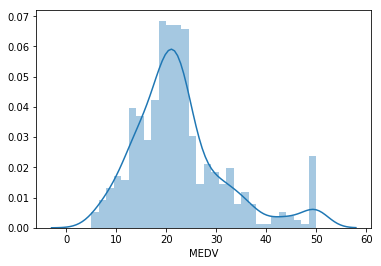

In [4]:
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### Korrelation visualisieren
Verschiedene Spalten des Datensatzes scheinen Einfluss auf den mittleren Immobilienpreis (MEDV) in einer Region zu haben. Um diese Korrelationen festzustellen, hilft es die Preise in zweidimensionalen "Scatter-Plots" anzeigen zu lassen.

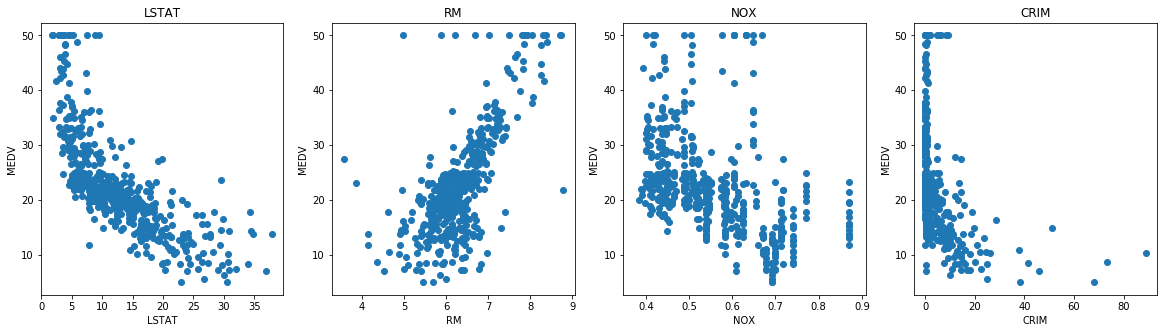

In [6]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'NOX']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Trainings- und Testdatensatz erstellen

In [52]:
X_train, X_test, y_train, y_test = train_test_split(boston['LSTAT'], boston['MEDV'], test_size = 0.2, random_state=5)

## Regressionsmodell mit `scikit-learn` erstellen

In [80]:
# Modell instanziieren
regr = linear_model.LinearRegression()

## Modell trainieren

In [69]:
# Anpassen des Input-Formats
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# Trainieren des Modells mit den Trainingsdaten
history = regr.fit(X_train, y_train)

In [70]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [71]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-0.97981166]
Mean squared error: 38.82
Variance score: 0.50


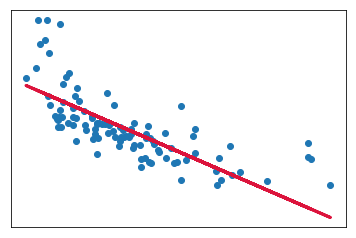

In [79]:
# Plot outputs
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='crimson', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Aufgaben
* Wie ändert sich die mittlere quadratische Abweichung (Mean Squared Error), wenn andere Attribute (Features) des Datensatzes genutzt werden?